Saving reduced_charge_discharge_data.csv to reduced_charge_discharge_data.csv


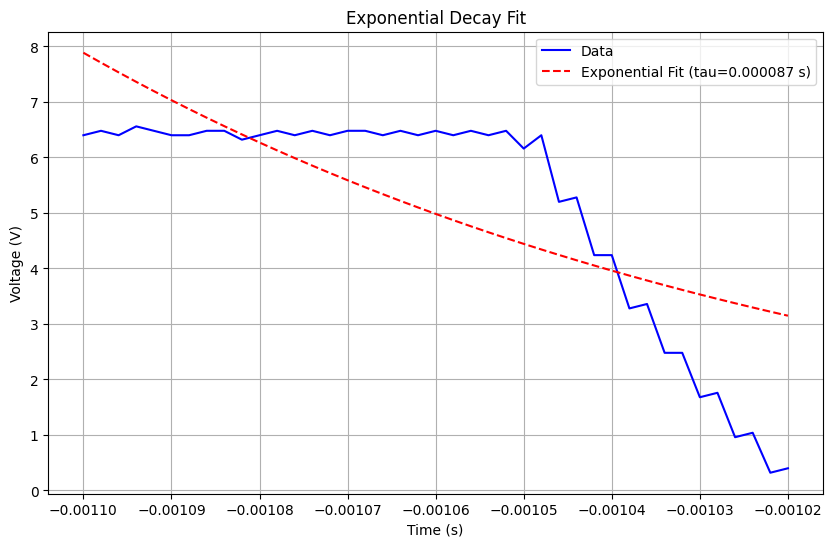

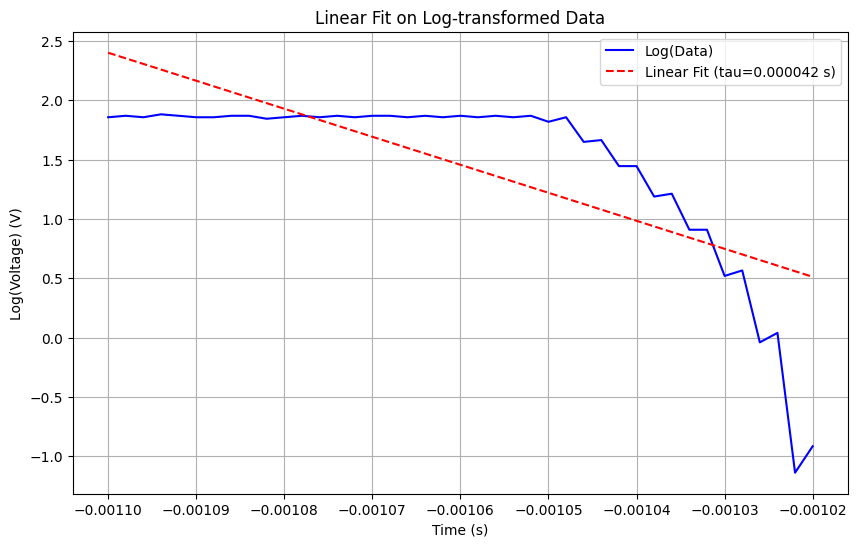

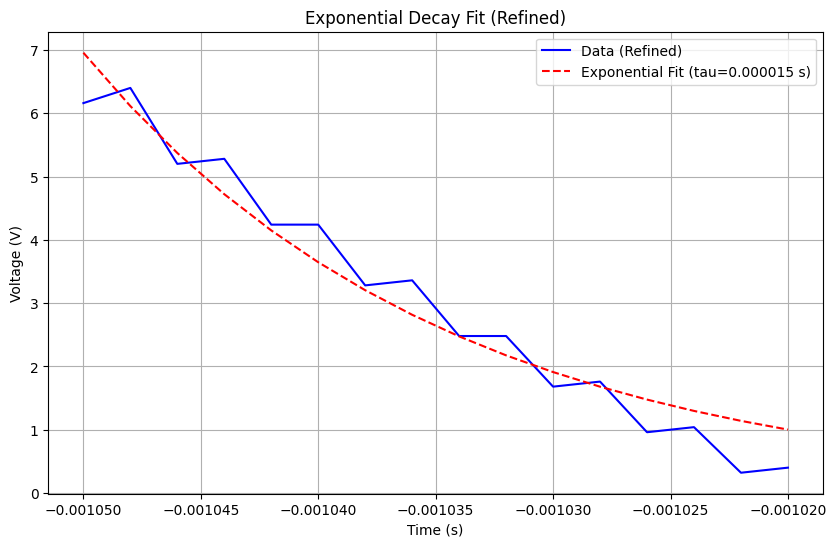

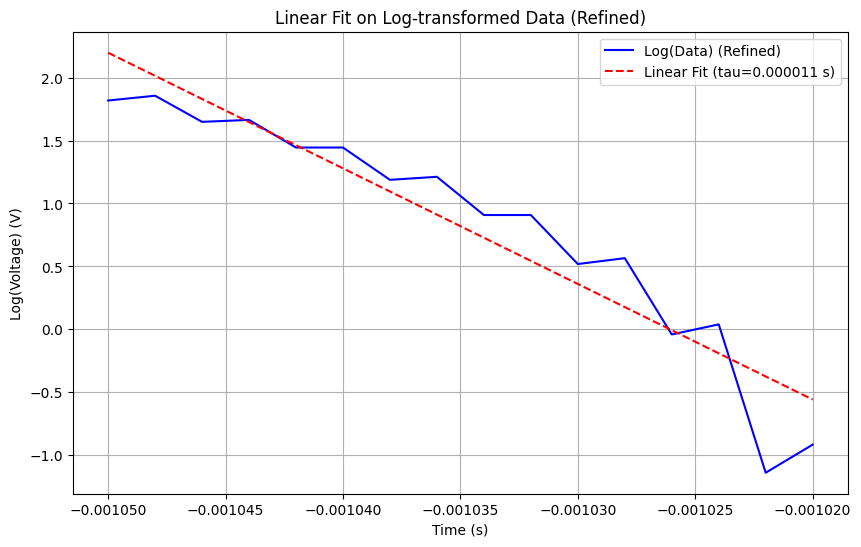


=== Refined Exponential Fit Results ===
V0 (initial voltage): 0.000000 ± 0.000000 V
Tau (time constant): 0.000015 ± 0.000001 seconds
R-squared: 0.946462

=== Refined Linear Fit Results ===
Slope: -91862.215195 ± 8688.541745
Intercept: -94.257445
Tau (time constant from linear fit): 0.000011 ± 0.000001 seconds
R-squared: 0.888698


In [1]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the CSV file

# ## RC Circuit Data Analysis

# This notebook analyzes RC circuit data by fitting it to an exponential decay model
# and performing linear regression on the logarithmically transformed data.

# ### 1. Importing Required Libraries

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualizations
from scipy.optimize import curve_fit  # For curve fitting
from scipy.stats import linregress  # For linear regression

# ### 2. Loading and Processing Data

# Load the reduced data file
file_path = 'reduced_charge_discharge_data.csv'  # Define the path to the CSV file
data = pd.read_csv(file_path)  # Load the CSV file into a pandas DataFrame

# Extract time and voltage data
time = data['Time (s)'].astype(np.float64)  # Convert the 'Time (s)' column to float64 for precision
voltage = data['Voltage (V)'].astype(np.float64)  # Convert the 'Voltage (V)' column to float64

# Remove any non-positive voltage values to avoid log issues
voltage = voltage[voltage > 0]  # Filter out non-positive voltage values
time = time[:len(voltage)]  # Ensure the time array matches the length of the voltage array

# ### 3. Exponential Decay Fitting

# Define the Exponential Decay Fit Function
def exponential_decay(t, V0, tau):
    return V0 * np.exp(-t / tau)  # Exponential decay model V(t) = V0 * exp(-t/tau)

# Refine initial guesses for V0 and tau
initial_guess = [voltage.max(), (time.max() - time.min()) / 3]  # Initial guess: V0 is max voltage, tau is a fraction of the time range

# Perform the exponential fit using curve_fit
popt_exp, pcov_exp = curve_fit(
    exponential_decay,  # The model function
    time,  # Independent variable (time)
    voltage,  # Dependent variable (voltage)
    p0=initial_guess,  # Initial guesses for V0 and tau
    maxfev=50000,  # Increase maximum iterations for fitting
    ftol=1e-10,  # Tighten the tolerance for better accuracy in fitting
    xtol=1e-10  # Set an additional tolerance parameter for convergence
)

# Extract the fitted parameters and uncertainties
V0_fitted_exp = popt_exp[0]  # Extract the best-fit value for V0
tau_fitted_exp = popt_exp[1]  # Extract the best-fit value for tau
perr_exp = np.sqrt(np.diag(pcov_exp))  # Calculate the uncertainties (standard deviations) for the fitted parameters
V0_err_exp = perr_exp[0]  # Uncertainty in V0
tau_err_exp = perr_exp[1]  # Uncertainty in tau

# Calculate R-squared for exponential fit
residuals_exp = voltage - exponential_decay(time, V0_fitted_exp, tau_fitted_exp)  # Calculate residuals
ss_res_exp = np.sum(residuals_exp**2)  # Calculate residual sum of squares
ss_tot_exp = np.sum((voltage - np.mean(voltage))**2)  # Calculate total sum of squares
r_squared_exp = 1 - (ss_res_exp / ss_tot_exp)  # Calculate R-squared

# ### 4. Linear Fit on Log-Transformed Data

# Logarithmic transformation for better stability in fitting
log_voltage = np.log(voltage)  # Take the natural logarithm of the voltage values

# Perform the linear fit on the log-transformed data
slope, intercept, r_value, p_value, std_err = linregress(time, log_voltage)  # Perform linear regression

# Calculate tau from the slope of the linear fit
tau_fitted_lin = -1 / slope  # Calculate tau from the slope
tau_err_lin = std_err / slope**2  # Calculate the uncertainty in tau
r_squared_lin = r_value**2  # Calculate R-squared for the linear fit

# ### 5. Plotting the Fits

# Exponential Fit Plot
plt.figure(figsize=(10, 6))  # Create a figure for the plot
plt.plot(time, voltage, 'b-', label='Data')  # Plot the original voltage data
plt.plot(time, exponential_decay(time, V0_fitted_exp, tau_fitted_exp), 'r--', label=f'Exponential Fit (tau={tau_fitted_exp:.6f} s)')  # Plot the fitted curve
plt.xlabel('Time (s)')  # Label the x-axis
plt.ylabel('Voltage (V)')  # Label the y-axis
plt.title('Exponential Decay Fit')  # Title the plot
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid lines to the plot
plt.show()  # Display the plot

# Linear Fit Plot
plt.figure(figsize=(10, 6))  # Create a figure for the plot
plt.plot(time, log_voltage, 'b-', label='Log(Data)')  # Plot the log-transformed voltage data
plt.plot(time, intercept + slope*time, 'r--', label=f'Linear Fit (tau={tau_fitted_lin:.6f} s)')  # Plot the linear fit
plt.xlabel('Time (s)')  # Label the x-axis
plt.ylabel('Log(Voltage) (V)')  # Label the y-axis
plt.title('Linear Fit on Log-transformed Data')  # Title the plot
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid lines to the plot
plt.show()  # Display the plot

# ### 6. Refined Analysis

# Refine the data by starting from the point where the big discharging begins (after plateau)
start_index = np.argmax(np.diff(voltage))  # Find the index where the steepest descent begins

# Use the refined data for the next analysis
time_refined = time[start_index:]  # Start the time array from this index
voltage_refined = voltage[start_index:]  # Start the voltage array from this index

# Perform the exponential fit for the refined data
popt_exp_refined, pcov_exp_refined = curve_fit(
    exponential_decay,  # The model function
    time_refined,  # Independent variable (time) for the refined data
    voltage_refined,  # Dependent variable (voltage) for the refined data
    p0=initial_guess,  # Initial guesses for V0 and tau
    maxfev=50000,  # Increase maximum iterations for fitting
    ftol=1e-10,  # Tighten the tolerance for better accuracy in fitting
    xtol=1e-10  # Set an additional tolerance parameter for convergence
)

# Extract the fitted parameters and uncertainties for the refined fit
V0_fitted_exp_refined = popt_exp_refined[0]  # Extract the best-fit value for V0
tau_fitted_exp_refined = popt_exp_refined[1]  # Extract the best-fit value for tau
perr_exp_refined = np.sqrt(np.diag(pcov_exp_refined))  # Calculate the uncertainties (standard deviations) for the refined fitted parameters
V0_err_exp_refined = perr_exp_refined[0]  # Uncertainty in V0 for the refined fit
tau_err_exp_refined = perr_exp_refined[1]  # Uncertainty in tau for the refined fit

# Calculate the residuals for the refined exponential fit
residuals_exp_refined = voltage_refined - exponential_decay(time_refined, V0_fitted_exp_refined, tau_fitted_exp_refined)
# Calculate the difference between the observed and fitted values for the refined data

# Calculate the total sum of squares (ss_tot) for the refined data
ss_tot_exp_refined = np.sum((voltage_refined - np.mean(voltage_refined))**2)
# Measure the total variance in the refined data

# Calculate the residual sum of squares (ss_res) for the refined exponential fit
ss_res_exp_refined = np.sum(residuals_exp_refined**2)
# Measure the variance in the residuals for the refined exponential fit

# Calculate the R-squared value for the refined exponential fit
r_squared_exp_refined = 1 - (ss_res_exp_refined / ss_tot_exp_refined)
# Calculate the R-squared value to determine how well the model explains the refined data

# Refined Linear Fit
log_voltage_refined = np.log(voltage_refined)  # Take the logarithm of the refined voltage values for linear fitting
slope_refined, intercept_refined, r_value_refined, p_value_refined, std_err_refined = linregress(time_refined, log_voltage_refined)
# Perform linear regression on the log-transformed refined data

# Calculate tau from the slope of the refined linear fit
tau_fitted_lin_refined = -1 / slope_refined
# Calculate tau from the slope of the refined linear fit

tau_err_lin_refined = std_err_refined / slope_refined**2
# Calculate the uncertainty in tau for the refined linear fit

r_squared_lin_refined = r_value_refined**2
# Calculate the R-squared value for the refined linear fit

# ### 7. Plotting the Refined Fits

# Refined Exponential Fit Plot
plt.figure(figsize=(10, 6))  # Create a figure for the refined exponential fit plot with a specified size
plt.plot(time_refined, voltage_refined, 'b-', label='Data (Refined)')
# Plot the refined voltage data in blue

plt.plot(time_refined, exponential_decay(time_refined, V0_fitted_exp_refined, tau_fitted_exp_refined), 'r--', label=f'Exponential Fit (tau={tau_fitted_exp_refined:.6f} s)')
# Plot the refined exponential fit in red, with the fitted tau value

plt.xlabel('Time (s)')  # Label the x-axis
plt.ylabel('Voltage (V)')  # Label the y-axis
plt.title('Exponential Decay Fit (Refined)')  # Title the plot
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid lines to the plot for better readability
plt.show()  # Display the plot

# Refined Linear Fit Plot
plt.figure(figsize=(10, 6))  # Create a figure for the refined linear fit plot with a specified size
plt.plot(time_refined, log_voltage_refined, 'b-', label='Log(Data) (Refined)')
# Plot the log-transformed refined voltage data in blue

plt.plot(time_refined, intercept_refined + slope_refined*time_refined, 'r--', label=f'Linear Fit (tau={tau_fitted_lin_refined:.6f} s)')
# Plot the refined linear fit in red, with the fitted tau value

plt.xlabel('Time (s)')  # Label the x-axis
plt.ylabel('Log(Voltage) (V)')  # Label the y-axis
plt.title('Linear Fit on Log-transformed Data (Refined)')  # Title the plot
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid lines to the plot for better readability
plt.show()  # Display the plot

# ### 8. Displaying the Refined Fit Results

print("\n=== Refined Exponential Fit Results ===")
print(f"V0 (initial voltage): {V0_fitted_exp_refined:.6f} ± {V0_err_exp_refined:.6f} V")
# Print the fitted V0 with its uncertainty for the refined exponential fit

print(f"Tau (time constant): {tau_fitted_exp_refined:.6f} ± {tau_err_exp_refined:.6f} seconds")
# Print the fitted tau with its uncertainty for the refined exponential fit

print(f"R-squared: {r_squared_exp_refined:.6f}")
# Print the R-squared value for the refined exponential fit

print("\n=== Refined Linear Fit Results ===")
print(f"Slope: {slope_refined:.6f} ± {std_err_refined:.6f}")
# Print the slope of the refined linear fit with its uncertainty

print(f"Intercept: {intercept_refined:.6f}")
# Print the intercept of the refined linear fit

print(f"Tau (time constant from linear fit): {tau_fitted_lin_refined:.6f} ± {tau_err_lin_refined:.6f} seconds")
# Print the tau from the refined linear fit with its uncertainty

print(f"R-squared: {r_squared_lin_refined:.6f}")
# Print the R-squared value for the refined linear fit

